# 1. Computer Science AP Analysis

This is a [Jupyter notebook](http://jupyter.org/) using Python3 to show how to explore the data mentioned in:

[Still No African-Americans Taking the AP Computer Science Exam in Nine States](http://blogs.edweek.org/edweek/curriculum/2015/11/no_african-american_students_2015_AP_computer_science_exam_nine_states.html) by [Liana Heitin](http://www.edweek.org/tm/contributors/liana%20.heitin.html) and based on the analysis by Barbara Ericson, Director of Computing Outreach and a senior research scientist at Georgia Tech.

This post was mentioned in Facebook's [CSEdForum](https://www.facebook.com/groups/CSEdForum/permalink/1510928882538869/) by Mark Guzdial; check out his [Computing Education Blog](https://computinged.wordpress.com/).

You can replicate (and try variations of) this notebook by:

* going to https://mybinder.org/repo/dsblank/cs-ap-analysis
* or simply clicking: [![Binder](http://mybinder.org/badge.svg)](http://mybinder.org/repo/dsblank/cs-ap-analysis)

or by downloading it (upper right-hand corner) and uploading it to your own Jupyter notebook server:

* [on your own desktop](http://jupyter.readthedocs.org/en/latest/install.html)

This notebook was created:

* by [Doug Blank](http://cs.brynmawr.edu/~dblank/)
* [Bryn Mawr College](http://www.brynmawr.edu/)
* Nov 5, 2015

Please feel free to copy, explore, and share! If you make corrections or additions, send me [email](mailto:dblank@cs.brynmawr.edu) and I'll update this notebook.

## 1.1 Software

In addition to using the Jupyter notebook, we assume that you have the following installed:

* matplotlib
* numpy

In addition, we will install these lesser-known libraries:

* openpyxl==2.3.0 - for reading Excel files
* metakernel - for its %download magic

These are already installed in our mybinder.org notebook.

And now we can:

In [1]:
import openpyxl   ## used in opening Excel spreadsheets

In [2]:
import metakernel
metakernel.register_ipython_magics()   ## used for its %download magic

## 1.2 Data

As the article above points out, you can get the data from this site:

http://research.collegeboard.org/programs/ap/data/participation/ap-2015

Here we show downloading one, after getting the link from above:

In [3]:
%download https://secure-media.collegeboard.org/digitalServices/pdf/research/2015/2015-Top-200-Colleges.xlsx

Downloaded '2015-Top-200-Colleges.xlsx'.


## 1.3 Analysis

This is an interesting experiment showing the difficulty in getting and analyzing data. Note:

* Excel spreadsheets are proprietary, yet used often to disseminate data
* Spreadsheets (of any kind) are good for displaying data for humans; not so good for computer analysis

Be on the lookout for inconsistent data types. For example, in the following spreadsheet, the year format changes from being an integer to being a string inexplicably in 1997. 

Also note:

* The College Board's website is marked "© 2015 The College Board"
* The data in the spreadsheet is marked with "© 2015 The College Board. All rights reserved."

I have no idea what the limits to using this data are. Use at your own risk.

First we download the data file:

In [4]:
%download http://media.collegeboard.com/digitalServices/misc/ap/pennsylvania-summary-2015.xlsx

Downloaded 'pennsylvania-summary-2015.xlsx'.


Then we use the openpyxl library to read in the data, and show the worksheet names. (I don't know this library, but after creating the Python object, you can type a dot followed by a TAB to show the methods. Or [read the sparse docs](http://openpyxl.readthedocs.org/en/latest/).)

In [5]:
workbook = openpyxl.load_workbook('pennsylvania-summary-2015.xlsx')
print(workbook.get_sheet_names())

['All', '11th', '12th', 'Females', 'Males', 'Public', 'In-State', 'Out-of-State', 'Annual Participation', 'Colleges Receiving Scores']


/home/main/anaconda/envs/python3/lib/python3.3/site-packages/openpyxl/workbook/names/named_range.py:124: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")


Using trial and error, we write a function that takes a workbook, finds the right sheet, and returns the data. This may perhaps work on any state's summary spreadsheet.

In [6]:
def get_annual_participation(workbook):
    worksheet = workbook.get_sheet_by_name("Annual Participation")
    data = {}
    row_count = 0
    for row in worksheet.iter_rows():
        year = row[0].value
        if (type(year) == str and year.isdigit()) or type(year) == int:
            year = str(row[0].value)
            students = int(row[2].value)
            data[year] = students
        row_count += 1
    data_keys = sorted(data.keys())
    data_values = [data[k] for k in data_keys]
    return data_keys, data_values

We call the function to get the data returned as [keys, values] where keys are the years (as strings) and values are the students taking the exam.

In [7]:
data = get_annual_participation(workbook)

For this demo, I'll use the standard library `matplotlib` because it is very common. I don't particularly like the interface, but it is flexible if not easy to use. I also use the standard method (in the sciences, especially Biology and Physics) of aliasing `matplotlib.pyplot` to be `plt`.

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

We can now plot our labels/data with this call to `plt.plot()`:

<IPython.core.display.Javascript object>


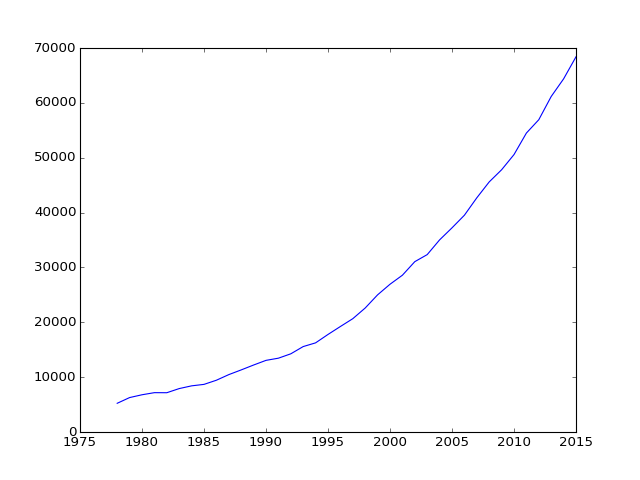

In [9]:
plt.plot(*data);

This is all students, by year, taking the an AP exam in Pennsylvania. 

What about in just a specific field, like Computer science? The data doesn't appear to be year in an annual breakdown, but we can get it for this year.

The field/topic names are this in the spreadsheet:

```python
['ART: \nHISTORY', 'BIOLOGY', 'CALCULUS AB', 'CALCULUS BC', 'CHEMISTRY', 'CHINESE LANG. \n& CULTURE', 'COMPUTER \nSCIENCE A', 'ECONOMICS: \nMACRO', 'ECONOMICS: \nMICRO', 'ENGLISH LANG-\n&COMPOSITION', 'ENGLISH LIT-\n&COMPOSITION', 'ENVIRONMENTAL \nSCIENCE', 'EUROPEAN \nHISTORY', 'FRENCH LANG. & CULTURE', 'GERMAN LANG. & CULTURE', 'GOVERNMENT &\nPOLITICS COMP.', 'GOVERNMENT &\nPOLITICS U.S.', 'HUMAN\nGEOGRAPHY', 'ITALIAN LANG. & CULTURE', 'JAPANESE LANG. & CULTURE', 'LATIN\n', 'MUSIC THEORY', 'PHYSICS 1', 'PHYSICS 2', 'PHYSICS C:\nELEC. & MAGNET.', 'PHYSICS C:\nMECHANICS', 'PSYCHOLOGY', 'SEMINAR', 'SPANISH LANG. & CULTURE', 'SPANISH LIT &\nCULTURE', 'STATISTICS', 'STUDIO ART: \n2-D DESIGN', 'STUDIO ART: \n3-D DESIGN', 'STUDIO ART: \nDRAWING', 'US HISTORY', 'WORLD HISTORY']
```

In [10]:
def get_ethnic_breakdown_by_topic(workbook, topic):
    worksheet = workbook.get_sheet_by_name("All")
    data = []
    ethnicity = []
    last_ethnic_group = None
    row_count = 0
    topics = None
    for row in worksheet.iter_rows():
        ethnic_group = row[1]
        ap_score = row[2]
        if row_count < 5:
            pass
        elif row_count == 5: ## get topics, remove newlines
            topics = [item.value for item in row]
        else:
            if ethnic_group.value is not None and not ethnic_group.value.startswith(" "):
                if ethnic_group.value.strip() != last_ethnic_group:
                    last_ethnic_group = ethnic_group.value.strip()
                    ethnicity.append(last_ethnic_group)
            if ap_score.value == "T":
                col = topics.index(topic)
                data.append(row[col].value)
        row_count += 1
    ## The sum of all but last should equal last:
    assert sum(data[:-1]) == data[-1]
    results = data[:-1]
    return [v.strip().title() for v in ethnicity[:len(results)]], results

In [11]:
data = get_ethnic_breakdown_by_topic(workbook, "COMPUTER \nSCIENCE A")

In [12]:
data

(['Not Stated',
  'American Indian',
  'Asian',
  'Black',
  'Mexican American',
  'Other',
  'Other Hispanic',
  'Puerto Rican',
  'White'],
 [17, 3, 328, 58, 8, 52, 17, 11, 1065])

Now, let's turn that into a bar chart: 

<IPython.core.display.Javascript object>


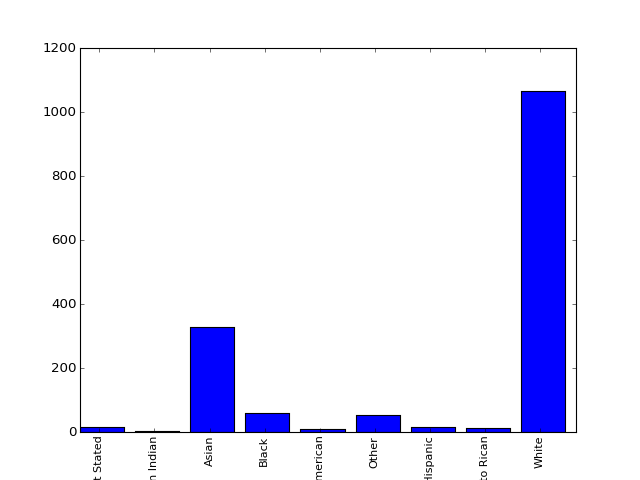

In [13]:
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

width = .35
index = np.arange(len(data[1]))
bars = ax.bar(index, data[1]);

xTickMarks = data[0]
ax.set_xticks(index+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10);

That code is way too complicated for me to produce a bar chart! I'm looking for another solution for me and students.

Hope this was useful!